In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [3]:
data=pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'date_time' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['NaN','?'], index_col='date_time')

In [4]:
data.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [6]:
data.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [7]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [8]:
data.var()

Global_active_power       1.117871
Global_reactive_power     0.012706
Voltage                  10.497514
Global_intensity         19.752658
Sub_metering_1           37.859792
Sub_metering_2           33.895992
Sub_metering_3           71.185566
dtype: float64

In [9]:
data.shape

(2075259, 7)

In [10]:
data.isnull()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,False,False,False,False,False,False,False
2006-12-16 17:25:00,False,False,False,False,False,False,False
2006-12-16 17:26:00,False,False,False,False,False,False,False
2006-12-16 17:27:00,False,False,False,False,False,False,False
2006-12-16 17:28:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,False,False,False,False,False,False,False
2010-11-26 20:59:00,False,False,False,False,False,False,False
2010-11-26 21:00:00,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

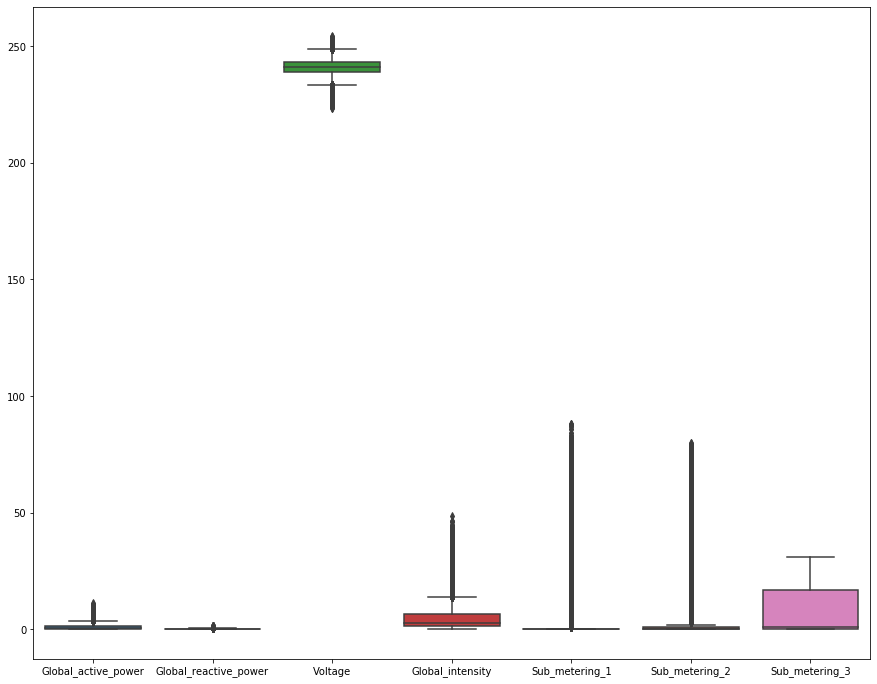

In [12]:
plt.figure(figsize=(15,12))
sns.boxplot(data = data)

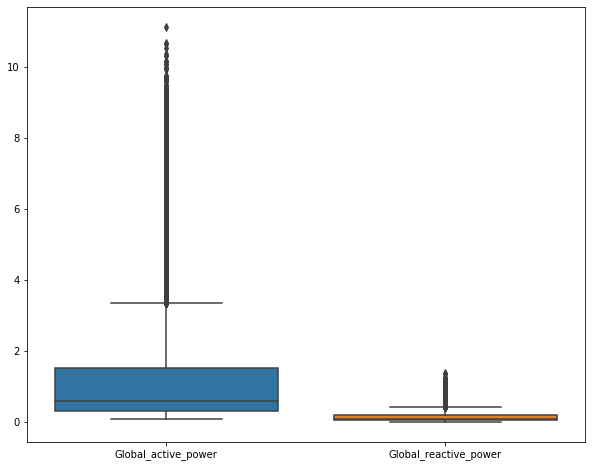

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data.iloc[:, :2])

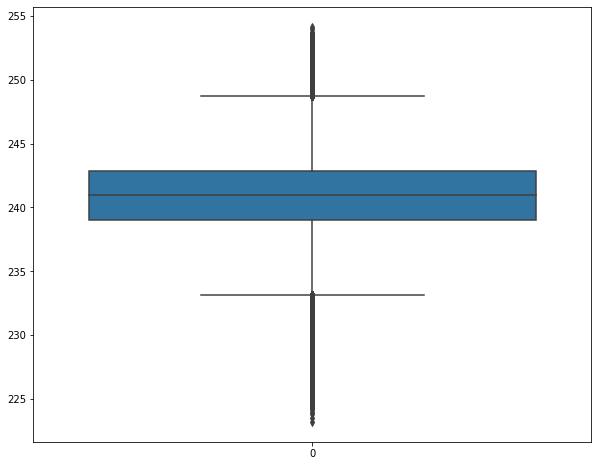

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data.iloc[:, 2])

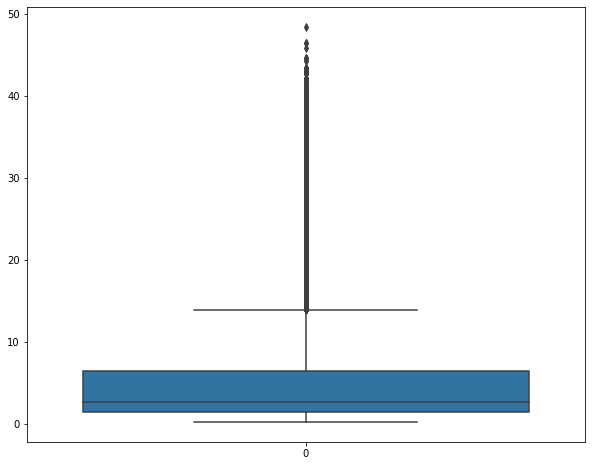

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data.iloc[:, 3])

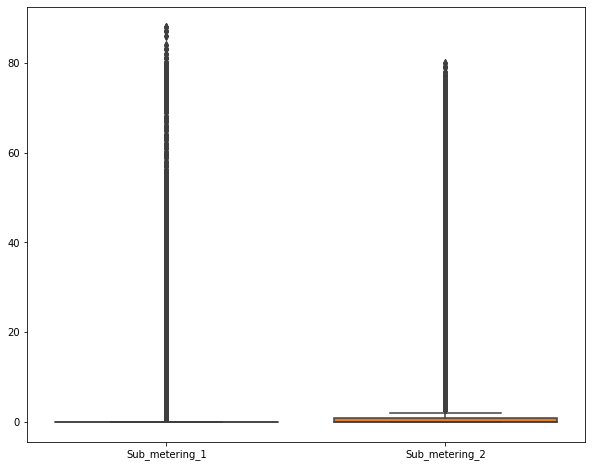

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data.iloc[:, 4:6])

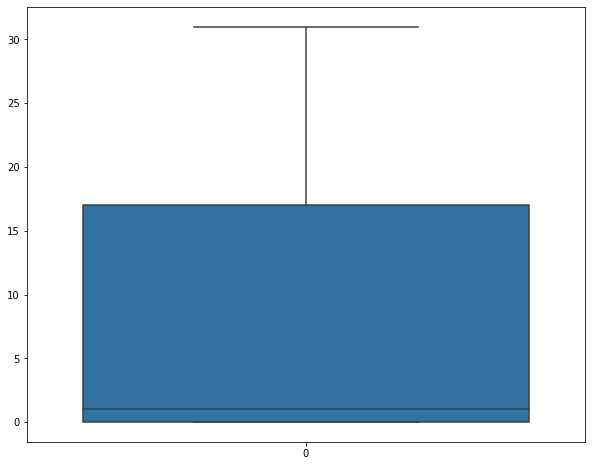

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data.iloc[:, 6])

Data Cleaning

In [18]:
for i in range(0,7):        
        data.iloc[:,i]=data.iloc[:,i].fillna(data.iloc[:,i].mean())

In [19]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Resampling Data

In [20]:
data_res_sum = data.resample('M').sum()
data_res_sum.var()

Global_active_power      1.392749e+08
Global_reactive_power    1.151210e+06
Voltage                  7.002042e+11
Global_intensity         2.280495e+09
Sub_metering_1           2.206840e+08
Sub_metering_2           2.572152e+08
Sub_metering_3           4.479508e+09
dtype: float64

Due to very high variance we will resample with mean

In [21]:
data_res = data.resample('M').mean()
data_res.var()

Global_active_power      0.086957
Global_reactive_power    0.000476
Voltage                  2.391892
Global_intensity         1.439971
Sub_metering_1           0.109312
Sub_metering_2           0.146501
Sub_metering_3           2.280055
dtype: float64

In [22]:
data_res.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1.101722,0.123632,240.848697,4.669871,1.124756,1.307773,6.479304
std,0.294885,0.021806,1.546574,1.199988,0.330624,0.382755,1.509985
min,0.276525,0.087166,235.178364,1.263720,0.086811,0.498804,1.784900
25%,0.969546,0.109523,240.358420,4.160685,0.974147,1.059223,5.612752
50%,1.122150,0.124916,240.881697,4.711271,1.184711,1.255707,6.733719
75%,1.279789,0.131733,241.740001,5.361921,1.307251,1.605725,7.357622
max,1.901148,0.187134,244.082274,8.029338,1.696617,2.346848,10.211481


In [23]:
data_res.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-31,1.901148,0.131384,241.441016,8.029338,1.248613,2.214821,7.409385
2007-01-31,1.546014,0.132676,240.905098,6.546829,1.264230,1.775909,7.383309
2007-02-28,1.401068,0.113637,240.519406,5.914505,1.180214,1.602346,6.703545


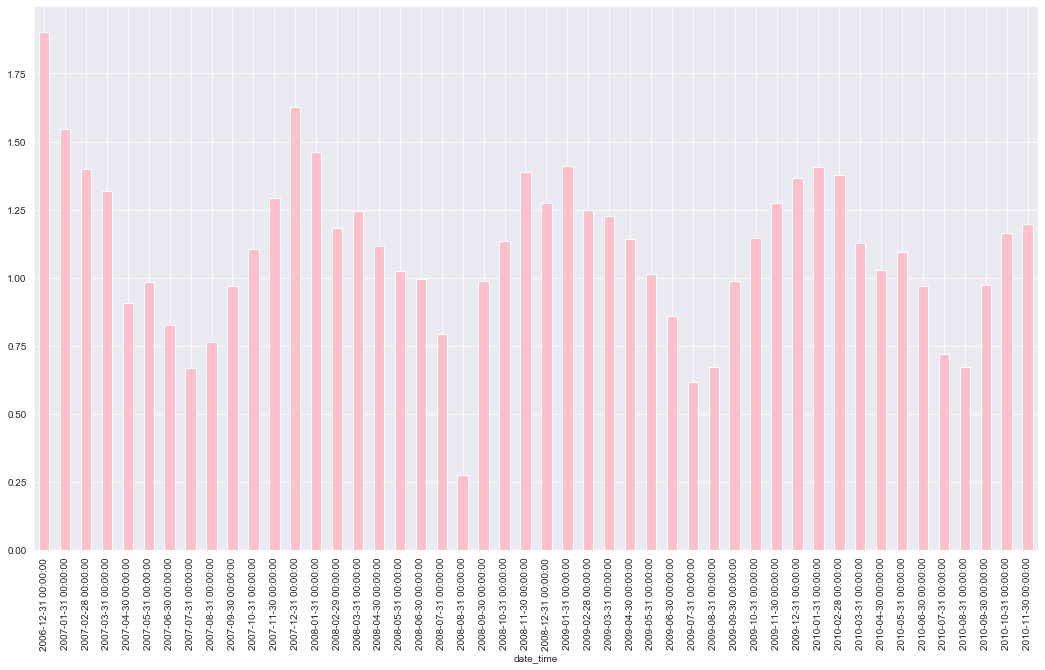

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize = (18,10))
data_res['Global_active_power'].plot(kind = 'bar', color = 'pink')

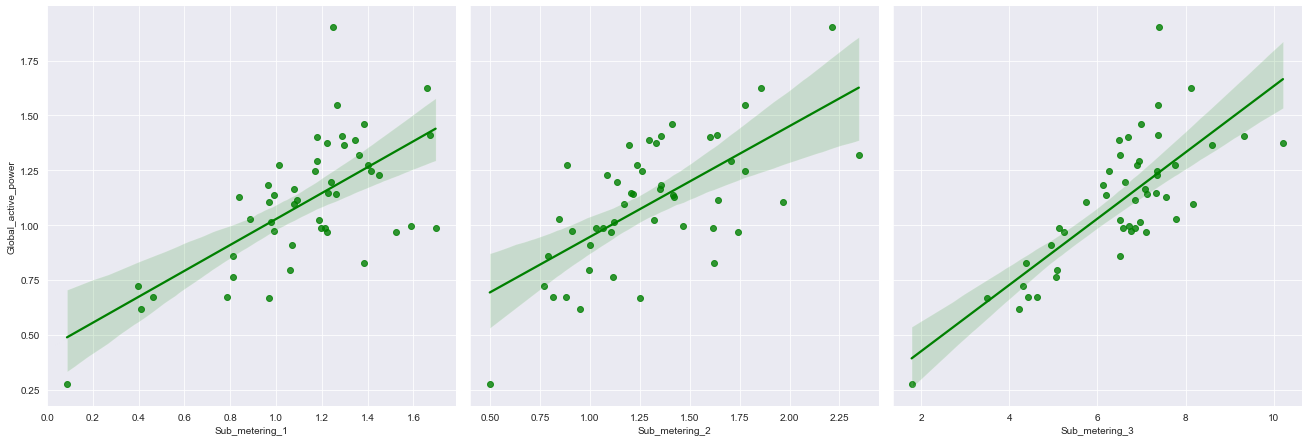

In [25]:
g = sns.PairGrid(data = data_res, y_vars= 'Global_active_power', x_vars = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], height=6)
g.map(sns.regplot, color = 'green')

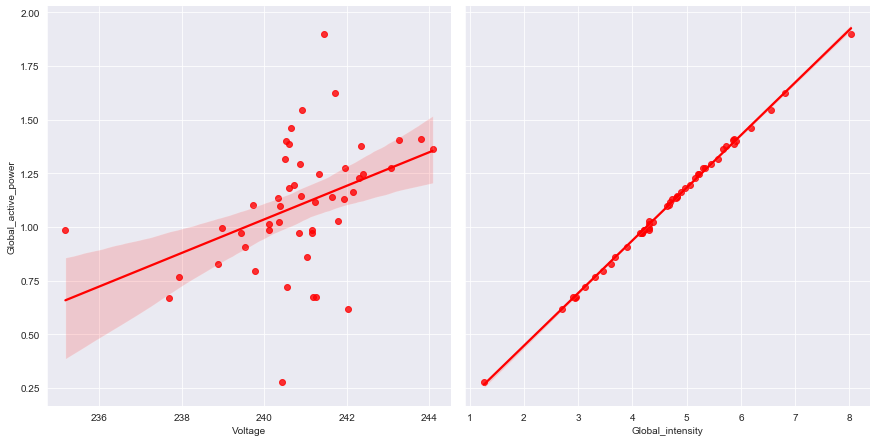

In [26]:
g = sns.PairGrid(data = data_res, y_vars= 'Global_active_power', x_vars = ['Voltage', 'Global_intensity'], height=6)
g.map(sns.regplot, color = 'red')

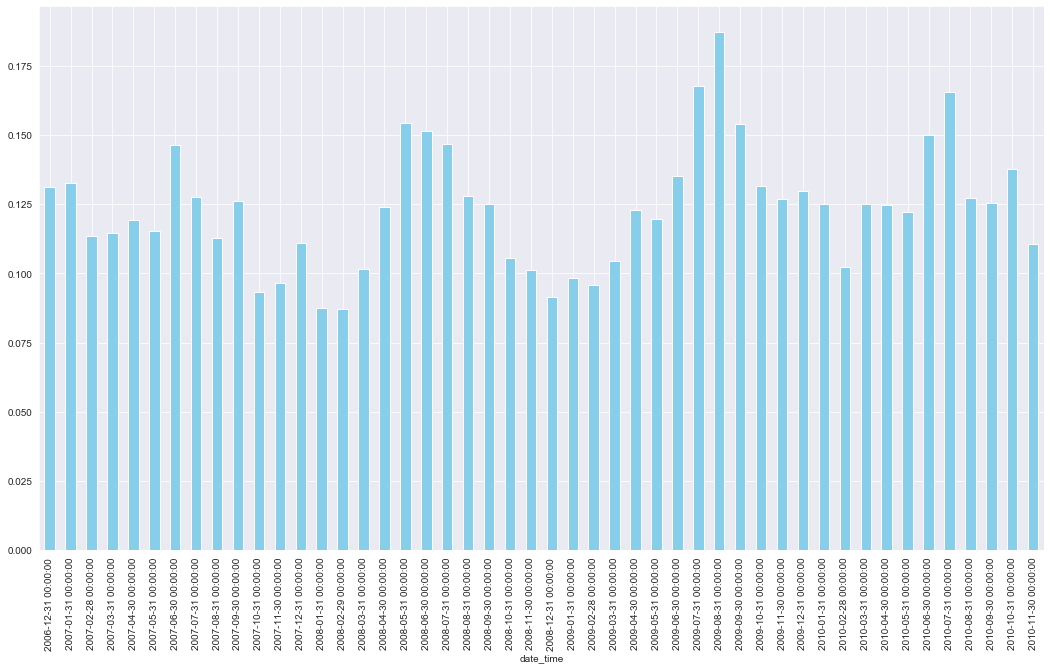

In [27]:
plt.figure(figsize = (18,10))
data_res['Global_reactive_power'].plot(kind = 'bar', color = 'skyblue')

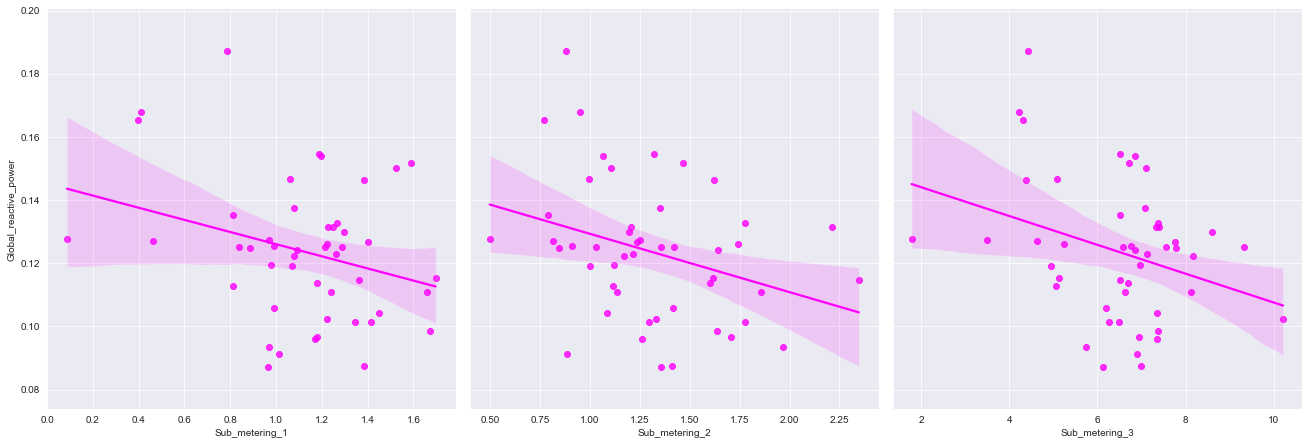

In [28]:
g = sns.PairGrid(data = data_res, y_vars= 'Global_reactive_power', x_vars = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], height=6)
g.map(sns.regplot, color = 'magenta')

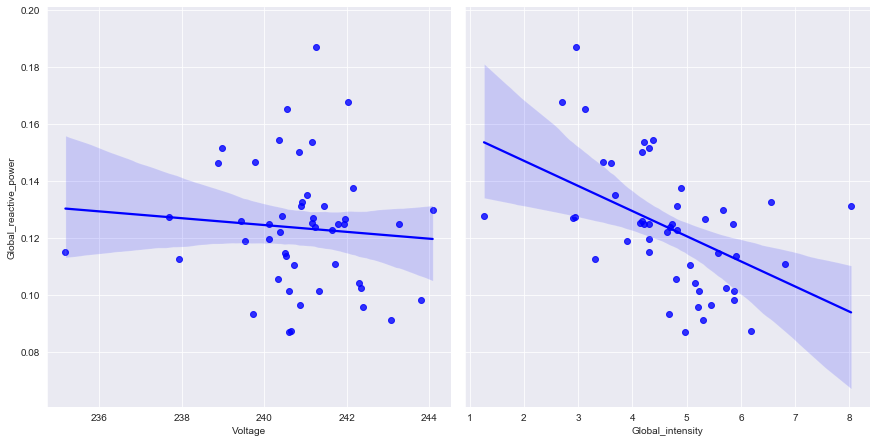

In [29]:
g = sns.PairGrid(data = data_res, y_vars= 'Global_reactive_power', x_vars = ['Voltage', 'Global_intensity'], height=6)
g.map(sns.regplot, color = 'blue')

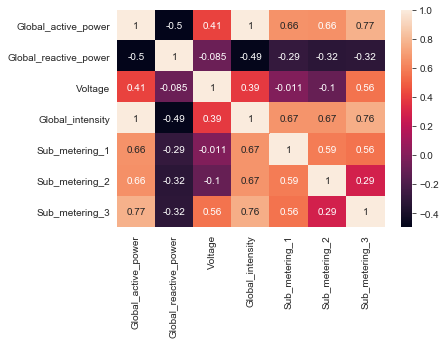

In [30]:
corr = data_res.corr()
sns.heatmap(corr, annot=True)

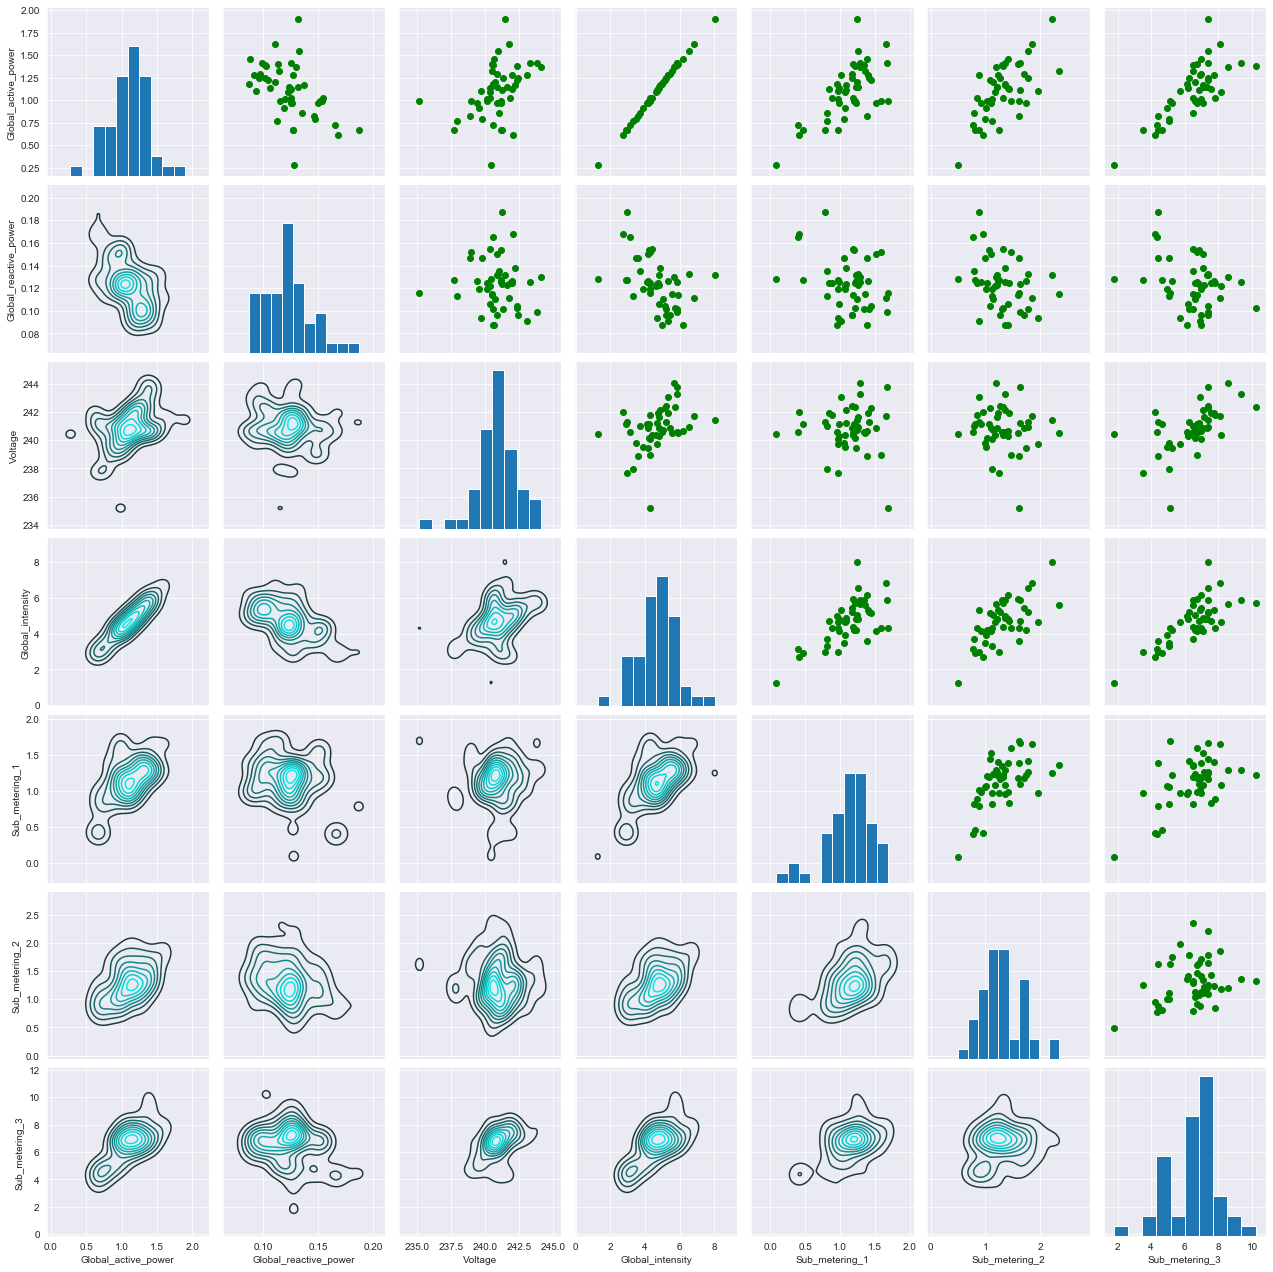

In [31]:
g = sns.PairGrid(data_res)
g.map_diag(plt.hist)
g.map_upper(plt.scatter, color = 'green')
g.map_lower(sns.kdeplot, color = 'cyan')

In [32]:
X = data_res.drop('Global_active_power', axis = 1).values
y = data_res['Global_active_power'].values
print(X.shape)

(48, 6)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=42)

In [34]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', knn.score(X_train, y_train))
print('Testing score: ', knn.score(X_test, y_test))

Mean Squared Error:  0.010686108125980639
Training Score:  0.8683331103090565
Testing score:  0.8489499088738937


In [35]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred  =svr.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', svr.score(X_train, y_train))
print('Testing score: ', svr.score(X_test, y_test))

Mean Squared Error:  0.06925389395570233
Training Score:  0.019542227717356808
Testing score:  0.021083553570483637


In [36]:
dt = DecisionTreeRegressor(max_depth=2, min_samples_leaf=4)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', dt.score(X_train, y_train))
print('Testing score: ', dt.score(X_test, y_test))

Mean Squared Error:  0.013096345532234337
Training Score:  0.8660637787465829
Testing score:  0.8148807626928782


In [37]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', rf.score(X_train, y_train))
print('Testing score: ', rf.score(X_test, y_test))

Mean Squared Error:  0.003694587957519217
Training Score:  0.985854282055266
Testing score:  0.9477763240763128


In [38]:
adb = AdaBoostRegressor(rf, n_estimators=200)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', adb.score(X_train, y_train))
print('Testing score: ', adb.score(X_test, y_test))

Mean Squared Error:  0.004825239232128104
Training Score:  0.9978340172346492
Testing score:  0.9317943616959866


In [39]:
gdb = GradientBoostingRegressor(n_estimators=150)
gdb.fit(X_train, y_train)
y_pred = gdb.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', gdb.score(X_train, y_train))
print('Testing score: ', gdb.score(X_test, y_test))

Mean Squared Error:  0.0030066994353651877
Training Score:  0.9999989246779653
Testing score:  0.9574997540408056
